<a href="https://colab.research.google.com/github/Vinaykumar26003/Pan-Card-Tampering-Detection/blob/main/PanCard_Tampering_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PanCard Tampering Detection
* In this project, we will detect tampering of pan card using computer vision.
* This project will help the organizations in detecting whether the id i.e, the pan card provided to them by their employees or customers or anyone is original or not.


#Project overview
1. Get images from user
2. Check for size and format of the image.
3. Change shape and size of the image according to the original image.
4. Convert the image to gray scale.
5. Find the similarity index of the image.
6. Find the threshold of the image.
7. Finding contour and Grabs those contour using imutils.
8. Draw a bounding rectangle using these contours.
9. Plot a difference, threshold, original and tampered image.
10. Compare all the images and check the similarity score to decide tampering.

In this project we will calculate structural similarity of original Pan card and it will be uploaded by the user.

In [ ]:
#import the necessary libraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import numpy as np
import requests
import io
from skimage.color import rgb2gray



In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [ ]:
#Open image and show
original = Image.open(io.BytesIO(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).content))
tampered = Image.open(io.BytesIO(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png", stream=True).content))

Load the Original and user provided images.

In [ ]:
# The format of the source file.
print(f"Original image format: {original.format}") # Access format directly from the 'original' variable
print(f"Tampered image format: {tampered.format}") # Access format directly from the 'tampered' variable

Original image format: JPEG
Tampered image format: PNG


In [ ]:
# The size is given as a 2-tuple (width, height) in pixels.
print(f"Original image size: {original.size}")
print(f"Tampered image size: {tampered.size}")

Original image size: (1200, 800)
Tampered image size: (282, 179)


Convert the format of tampered image similar to original image.

In [ ]:
# Resizing Image
img_size = (250, 160)
original = original.resize(img_size)
tampered = tampered.resize(img_size)

In [ ]:
original.save('/content/pan_card_tampering/image/original.jpg')
tampered.convert('RGB').save('/content/pan_card_tampering/image/tampered.png')

In [ ]:
original = Image.open('/content/pan_card_tampering/image/original.jpg')
tampered = Image.open('/content/pan_card_tampering/image/tampered.png')

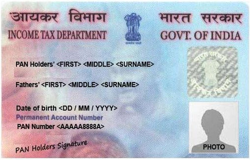

In [ ]:
# Display the Original Image
original

Original PAN card image used for comparision.

In [ ]:
# Display the user given image
tampered

User provided image will be compared with PAN card.

In [ ]:
# Load images using OpenCV to ensure consistent handling
original = cv2.imread('/content/pan_card_tampering/image/original.jpg')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

Read images using opencv

In [ ]:
# Calculate SSIM
# Convert tampered image to RGB by dropping the alpha channel if it exists
tampered = cv2.cvtColor(tampered, cv2.COLOR_BGRA2BGR)

# Ensure both images have the same dimensions
original = cv2.resize(original, (250, 160))
tampered = cv2.resize(tampered, (250, 160))

# Convert images to grayscale
original_gray = (rgb2gray(original)*255).astype('uint8')
tampered_gray = (rgb2gray(tampered)*255).astype('uint8')

# Calculate SSIM
score, diff_img = structural_similarity(original_gray, tampered_gray, full=True)
diff_img = (diff_img*255).astype("uint8")
print(f"SSIM: {score}")

SSIM: 0.3262892199848829


* Convert images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images are bit complex to understand by machine because they have 3 channel while grayscale has only 1 channel.
* Structural similarity index helps us to determine exactly in terms of x,y coordinates location, the image differences are.
Here, we are trying to find similarities between original and tampered image.The lower the SSIM score lower is the similarity.

In [ ]:
# Calculate Threshold
# Use diff_img instead of diff
thresh = cv2.threshold(diff_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

* We are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into binary image using a mathematical formula.
* Finding contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# Loop over the contours
for c in cnts:
   # Applying contours on image
   (x, y, w, h) = cv2.boundingRect(c)
   cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
   cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original format image


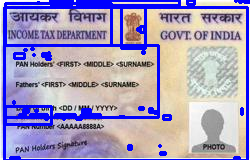

In [ ]:
# Diplay original image with contour
print("Original format image")
Image.fromarray(original)

Tempered image


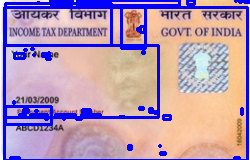

In [ ]:
# Diplay tampered image with contour
print("Tempered image")
Image.fromarray(tampered)

Different Image


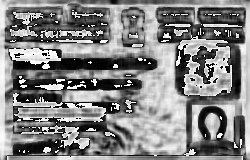

In [ ]:
# Diplay difference image with black
print('Different Image')
Image.fromarray(diff_img)

Threshold Image


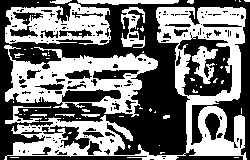

In [ ]:
# Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

#Summary

Finding out structural similarity of the images helped us in finding the difference or similarity imn the shape of the images.<br>Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.<br>

As, our SSIM is ~32.2% we can say that the image user provided is fake or tampered.<br>

Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.

#Scope

This project can be used in different organizations where customers or users need to provide any kimd of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarity this can be used for any type of ID like adhar, voter id, employee id, student id, etc.